In [1]:
# 🚀 Gradio Interface for Brain Weight Prediction
!pip install gradio scikit-learn joblib --quiet
import gradio as gr
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd
from datetime import datetime
from pathlib import Path

# Dummy data and model

data=pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:

X = np.array(data['Head Size(cm^3)'].values).reshape(-1, 1)
y = np.array(data['Brain Weight(grams)'].values)
model = LinearRegression()
model.fit(X, y)
joblib.dump(model, "model.pkl")

# Load model for Gradio

model = joblib.load("model.pkl")

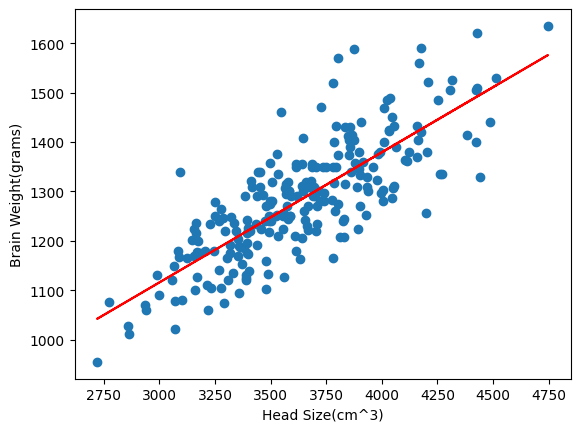

In [3]:
import matplotlib.pyplot as plt
#regression line
plt.plot(X,model.predict(X),color='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.scatter(X,y)
plt.show()

In [4]:
# 3. Define Logging Function 👇
def log_prediction(head_size, age, gender, notes, prediction):
    log_df = pd.DataFrame([[datetime.now(), head_size, age, gender, notes, prediction]],
                          columns=["timestamp", "head_size", "age", "gender", "notes", "predicted_brain_weight"])

    log_df.to_csv("prediction_logs.csv", mode='a', header=not Path("prediction_logs.csv").exists(), index=False)

In [6]:
def predict_brain_weight(head_size, age, gender, notes):
    prediction = model.predict([[head_size]])[0]
    log_prediction(head_size, age, gender, notes, prediction)
    return f"Estimated Brain Weight: {prediction:.2f} grams"
interface = gr.Interface(
    fn=predict_brain_weight,
    inputs=[
        gr.Slider(2500, 5000, step=50, label="Head Size (cm³)"),
        gr.Textbox(label="Age (optional)", placeholder="e.g. 29"),
        gr.Radio(["Male", "Female", "Other"], label="Gender (optional)"),
        gr.Textbox(label="Notes", lines=2, placeholder="Any additional notes?")
    ],
    outputs=gr.Text(label="Predicted Brain Weight"),
    title="🧠 Debosmita's Brain Weight Predictor",
    description="An ML-powered demo to estimate brain weight from head size. Logs each prediction with optional metadata for analysis."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e98d525ef1c83d0144.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
